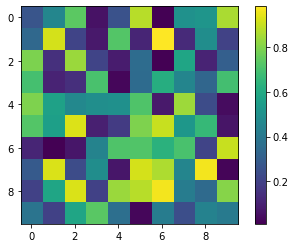

In [1]:
import numpy as np
from matplotlib import pyplot as plt

random_image = np.random.random([10,10])

plt.imshow(random_image)
plt.colorbar();

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (303, 384)


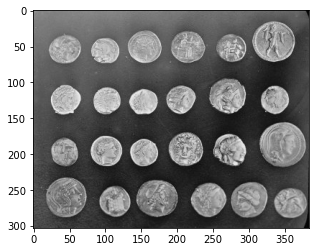

In [2]:
from skimage import data

coins = data.coins()

print('Type:', type(coins))
print('dtype:', coins.dtype)
print('shape:', coins.shape)

plt.imshow(coins, cmap='gray');

Shape: (300, 451, 3)
Values min/max: 0 231


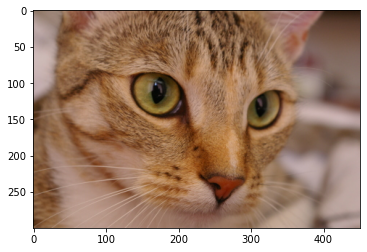

In [3]:
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat);

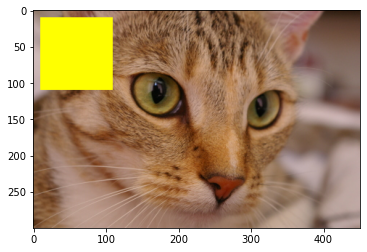

In [4]:
cat[10:110, 10:110] = [255, 255, 0]  # [red, green, blue]
plt.imshow(cat);

In [5]:
from skimage import data

img0 = data.chelsea()
img1 = data.rocket()

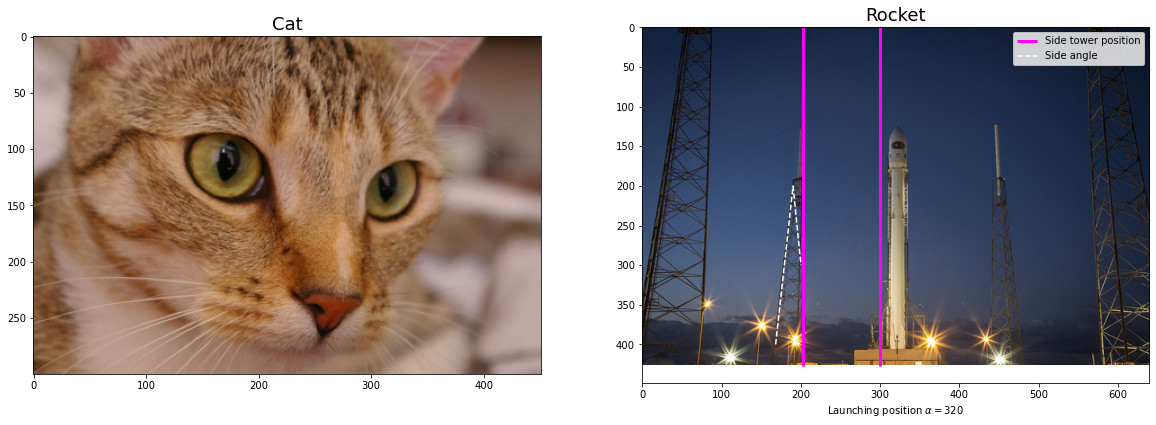

In [6]:
import matplotlib.pyplot as plt

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

ax0.imshow(img0)
ax0.set_title('Cat', fontsize=18)
#ax0.axis('off')

ax1.imshow(img1)
ax1.set_title('Rocket', fontsize=18)
ax1.set_xlabel(r'Launching position $\alpha=320$')

ax1.vlines([202, 300], 0, img1.shape[0], colors='magenta', linewidth=3, label='Side tower position')
ax1.plot([168, 190, 200], [400, 200, 300], color='white', linestyle='--', label='Side angle')

ax1.legend();

Linear0: float64 0.0 1.0
Linear1: uint8 0 255


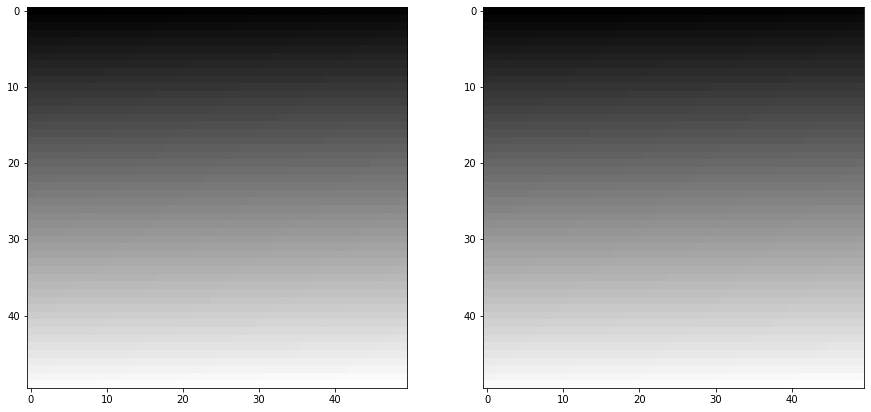

In [7]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

<class 'numpy.ndarray'>
uint8
(630, 630, 3)
0 255


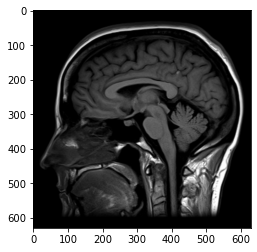

In [9]:
from skimage import io

image = io.imread('E:\ITS_Stuff\Semester 6\pcm_v2\Week_9\Brain.jpeg')

print(type(image))
print(image.dtype)
print(image.shape)
print(image.min(), image.max())

plt.imshow(image);

In [9]:
im1 = io.ImageCollection('D:\Teaching\Pengolahan Citra Medika\Database\*.jpeg')
im2 = io.ImageCollection('D:\Teaching\Pengolahan Citra Medika\Database\*.jpg')
ic = im1
print('Type:', type(ic))

ic.files

Type: <class 'skimage.io.collection.ImageCollection'>


['D:\\Teaching\\Pengolahan Citra Medika\\Database\\1_l83-JpmYdbv1Cx0RWI1w3w.jpeg',
 'D:\\Teaching\\Pengolahan Citra Medika\\Database\\78de707f66bbf12bf2da188b96bb2e_big_gallery.jpeg',
 'D:\\Teaching\\Pengolahan Citra Medika\\Database\\Brain.jpeg']

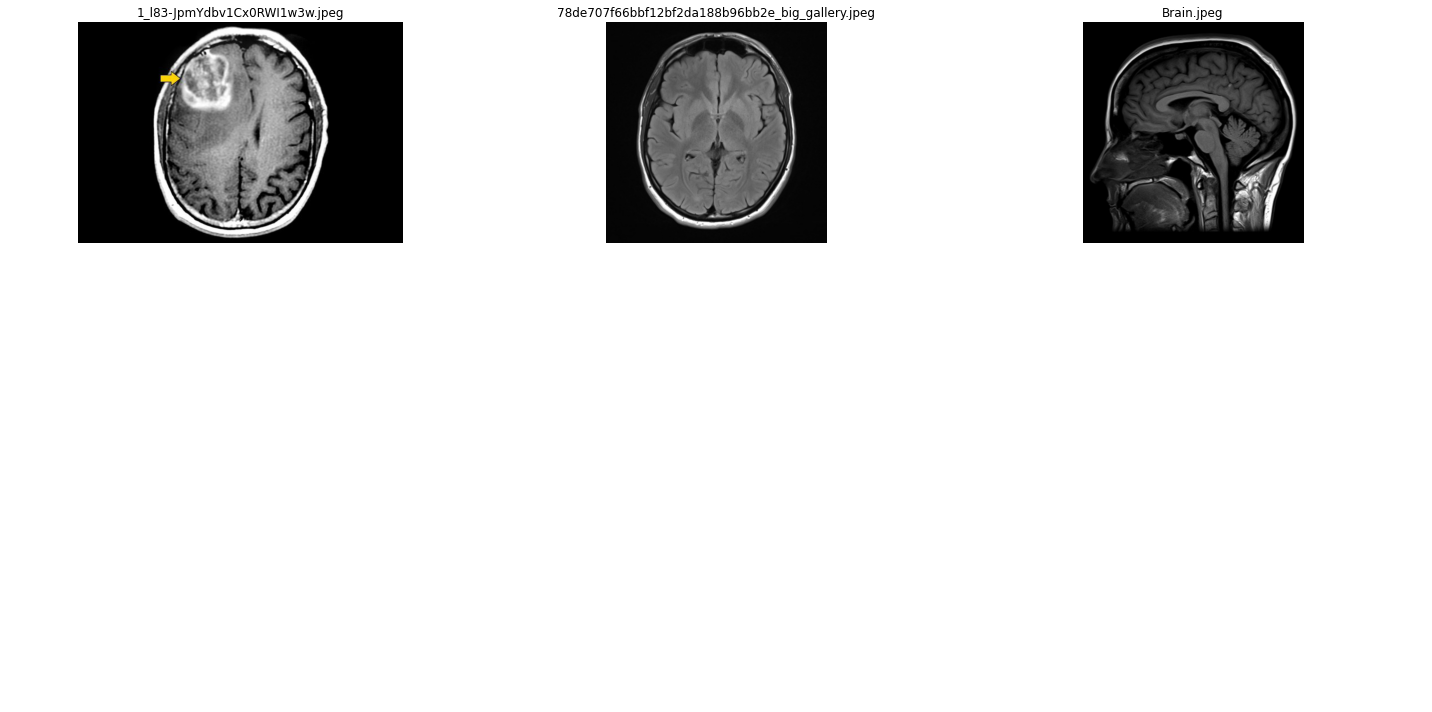

In [10]:
import os

f, axes = plt.subplots(nrows=3, ncols=len(ic) // 1, figsize=(20, 10))

# Gunakan `axes.ravel()` untuk mengubahnya menjadi daftar
axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(ic):
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(os.path.basename(ic.files[i]))
    
plt.tight_layout()

In [11]:
BMEs = ['Intelligent Biomedical Instrumentation', 'Assistive Technology and Rehabilitation Engineering', 'Medical Imaging and Image Processing','Medical Informatics']
for i, BME in enumerate(BMEs):
    print('Expertise in BME consist of {} is {}'.format(i, BME))

Expertise in BME consist of 0 is Intelligent Biomedical Instrumentation
Expertise in BME consist of 1 is Assistive Technology and Rehabilitation Engineering
Expertise in BME consist of 2 is Medical Imaging and Image Processing
Expertise in BME consist of 3 is Medical Informatics


In [10]:
def draw_H(image, coords, color=(0, 255, 0)):
    out = image.copy()
    
    r, c = coords
    H = out[r:r+24, c:c + 20]
    
    H[:, :3, :] = color
    H[:, -3:, :] = color
    H[11:13, :] = color
    
    return out

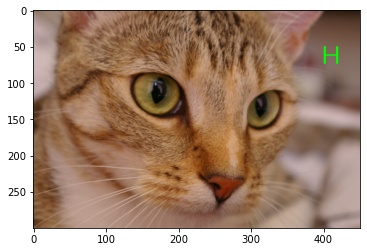

In [11]:
cat = data.chelsea()
cat_H = draw_H(cat, (50, -50))
plt.imshow(cat_H);

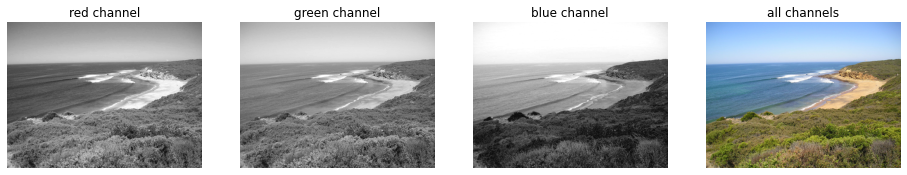

In [12]:
# --- baca citra ---

image = plt.imread('E:\ITS_Stuff\Semester 6\pcm_v2\Week_9\Beach.jpg')

# --- tetapkan setiap channel warna ke variabel yang berbeda ---

r = image[:, :, 0]
g = image[..., 1 ] 
b = image[..., 2]

# --- Tampilkan citra dari channel R, G, B ---

f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

# --- Disini, kita buat tumpukan layer RGB ---
#     untuk membentuk citra berwarna ---
ax_color.imshow(np.stack([r, g, b], axis=2))
ax_color.set_title('all channels');

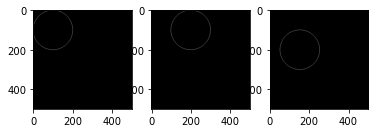

In [15]:
from skimage import draw
import numpy as np

red = np.zeros((500, 500))
green = np.zeros((500, 500))
blue = np.zeros((500, 500))

r, c = draw.circle_perimeter(100, 100, 100)
red[r, c] = 1

r, c = draw.r, c = draw.circle_perimeter(100, 200, 100)
green[r, c] = 1

r, c = draw.r, c = draw.circle_perimeter(200, 150, 100)
blue[r, c] = 1

f, axes = plt.subplots(1, 3)
for (ax, channel) in zip(axes, [red, green, blue]):
    ax.imshow(channel, cmap='gray')
    #ax.axis('off')

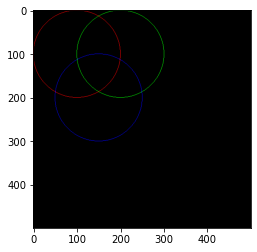

In [16]:
color_stack = np.dstack([red, green, blue])
color_stack.shape
plt.imshow(color_stack);

(300, 225)

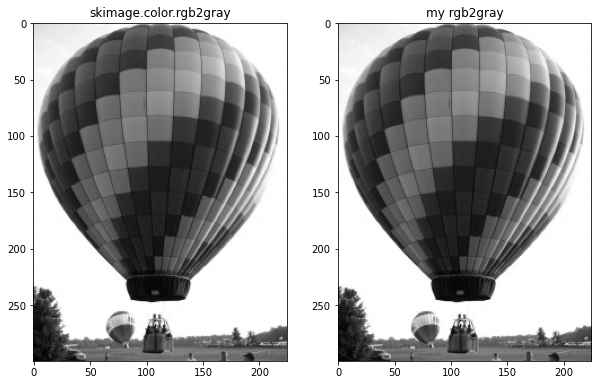

In [17]:
from skimage import color, img_as_float

image = img_as_float(io.imread('E:\ITS_Stuff\Semester 6\pcm_v2\Week_9\Balloon.jpg'))

gray = color.rgb2gray(image)
my_gray = image @ [0.2126, 0.7152, 0.0722]

# --- Tampilkan ---

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 10))

ax0.imshow(gray, cmap='gray')
ax0.set_title('skimage.color.rgb2gray')

ax1.imshow(my_gray, cmap='gray')
ax1.set_title('my rgb2gray')
my_gray.shape